# Aleatory Uncertainty introduced by DL model training

In [23]:
pip install torch matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\emanuele.buchicchio\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## Aleatory uncertainty in regression

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define a simple regression dataset
# Suppose we have a dataset with one feature and continuous labels
# This is just a dummy dataset for demonstration purposes

X = torch.unsqueeze(torch.linspace(1, 20, 20), dim=1)
y= 3*X + 4*torch.rand(X.size()) 


# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 16)  # Input layer with 1 input feature and 2 hidden units
        self.relu = nn.ReLU()       # ReLU activation function
        self.fc2 = nn.Linear(16, 1)  # Output layer with 1 output unit

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Create an instance of the model
model01 = NeuralNetwork()
model02 = NeuralNetwork()

# set all model parameters to zero
for param in model02.parameters():
    param.data.fill_(0.001)

# initialize the model parameters with random values
for param in model01.parameters():
    param.data.uniform_(-1, 1)
    #param.data.normal_(0, 1)


# Define the loss function (mean squared error loss)
criterion = nn.MSELoss()

# Create two separate optimizer instances with different starting points
optimizer1 = optim.Adam(model01.parameters(), lr=0.1)
optimizer2 = optim.Adam(model02.parameters(), lr=0.1)

# Training loop for optimizer 1
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model01(X)
    
    # Compute the loss
    loss = criterion(outputs, y)
    
    # Zero the gradients
    optimizer1.zero_grad()
    
    # Backpropagation
    loss.backward()
    
    # Update the weights
    optimizer1.step()
    
    # Print the loss at every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Optimizer 1: Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Training loop for optimizer 2
for epoch in range(num_epochs):
    # Forward pass
    outputs = model02(X)
    
    # Compute the loss
    loss = criterion(outputs, y)
    
    # Zero the gradients
    optimizer2.zero_grad()
    
    # Backpropagation
    loss.backward()
    
    # Update the weights
    optimizer2.step()
    
    # Print the loss at every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Optimizer 2: Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Optimizer 1: Epoch [100/1000], Loss: 1.2304
Optimizer 1: Epoch [200/1000], Loss: 1.2150
Optimizer 1: Epoch [300/1000], Loss: 1.1695
Optimizer 1: Epoch [400/1000], Loss: 1.1136
Optimizer 1: Epoch [500/1000], Loss: 1.0608
Optimizer 1: Epoch [600/1000], Loss: 1.0352
Optimizer 1: Epoch [700/1000], Loss: 1.0290
Optimizer 1: Epoch [800/1000], Loss: 1.0282
Optimizer 1: Epoch [900/1000], Loss: 1.0280
Optimizer 1: Epoch [1000/1000], Loss: 1.0281
Optimizer 2: Epoch [100/1000], Loss: 1.2534
Optimizer 2: Epoch [200/1000], Loss: 1.2486
Optimizer 2: Epoch [300/1000], Loss: 1.2486
Optimizer 2: Epoch [400/1000], Loss: 1.2486
Optimizer 2: Epoch [500/1000], Loss: 1.2486
Optimizer 2: Epoch [600/1000], Loss: 1.2486
Optimizer 2: Epoch [700/1000], Loss: 1.2486
Optimizer 2: Epoch [800/1000], Loss: 1.2486
Optimizer 2: Epoch [900/1000], Loss: 1.2486
Optimizer 2: Epoch [1000/1000], Loss: 1.2486


Predictions model1:
tensor([[ 5.7426],
        [ 8.3647],
        [10.9867],
        [13.6087],
        [16.2307],
        [18.8569],
        [21.9353],
        [25.0137],
        [28.0920],
        [31.1704],
        [34.2488],
        [37.3271],
        [40.4055],
        [43.4839],
        [46.5622],
        [49.6406],
        [52.7189],
        [55.7973],
        [58.8757],
        [61.9540]])
Predictions model2:
tensor([[ 4.6055],
        [ 7.6011],
        [10.5966],
        [13.5922],
        [16.5878],
        [19.5833],
        [22.5789],
        [25.5745],
        [28.5700],
        [31.5656],
        [34.5612],
        [37.5567],
        [40.5523],
        [43.5479],
        [46.5434],
        [49.5390],
        [52.5346],
        [55.5301],
        [58.5257],
        [61.5213]])


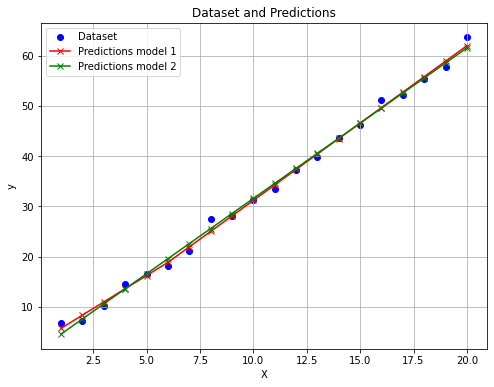

In [15]:
import numpy as np
import matplotlib.pyplot as plt


# Evaluate the trained model
with torch.no_grad():    
    predicted1 = model01(X)
    print("Predictions model1:")
    print(predicted1)

    predicted2 = model02(X)
    print("Predictions model2:")
    print(predicted2)

# Convert tensors to NumPy arrays for plotting
X = X.numpy()
y = y.numpy()
predicted1 = predicted1.numpy()
predicted2 = predicted2.numpy()

# Plot the dataset and predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Dataset', color='blue')
plt.plot(X, predicted1, label='Predictions model 1', color='red', marker='x')
plt.plot(X, predicted2, label='Predictions model 2', color='green', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Dataset and Predictions')
plt.grid(True)
plt.show()





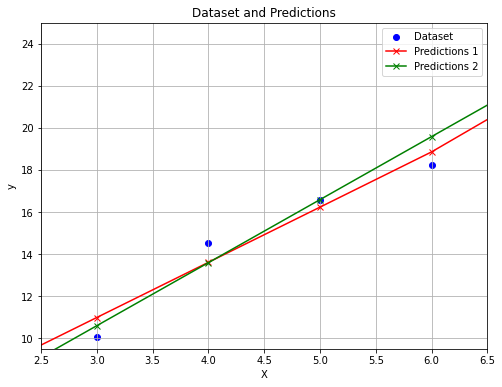

In [18]:
# zoom in on the plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Dataset', color='blue')
plt.plot(X, predicted1, label='Predictions 1', color='red', marker='x')
plt.plot(X, predicted2, label='Predictions 2', color='green', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Dataset and Predictions')
plt.grid(True)
plt.xlim(2.5, 6.5)
plt.ylim(9.5, 25)
plt.show()

In [20]:
# get models prediction for x=5

x5=torch.tensor([5.0])

with torch.no_grad():    
    predicted1 = model01(x5)
    print("Model1 prediction for 5:")
    print(predicted1)

    predicted2 = model02(x5)
    print("Model2 prediction for 5:")
    print(predicted2)

model1 prediction for 5:
tensor([16.2307])
model2 prediction for 5:
tensor([16.5878])


## Aleatory uncertainty in classification